In [2]:
import pandas as pd

# Load the dataset
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
                'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
                'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
                'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
                'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
                'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
                'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
                'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
                'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
                'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
                'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
                'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
                'spam']
dataset = pd.read_csv('spambase.data', header=None, names=column_names)

In [3]:
print(dataset.head())
print(dataset.info())


                                             word_freq_make  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00            0.00   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00            0.94   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64            0.25   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31            0.63   
                                       0.31            0.63   

                                             word_freq_address  word_freq_all  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00               0.00           0.64   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00               0.21           0.79   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64               0.38           0.45   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31               0.31           0.31   
                                       0.31               0.31           0.31   

                                             word_freq_3d  word_freq_our  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00          0.00 

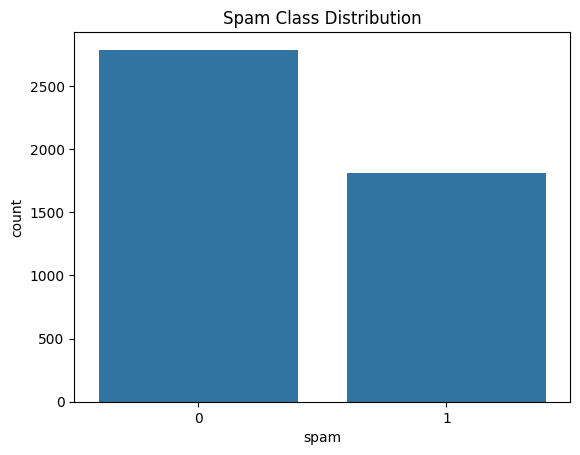

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='spam', data=dataset)
plt.title('Spam Class Distribution')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X = dataset.drop('spam', axis=1)
y = dataset['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


c:\Users\dst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       531
           1       0.92      0.87      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

Decision Tree Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       531
           1       0.89      0.85      0.87       390

    accuracy                           0.89       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.89      0.89      0.89       921

Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       531
           1       0.97      0.90      0.93       390

    accuracy                           0.95       921
   macro avg       0.95      0.94  

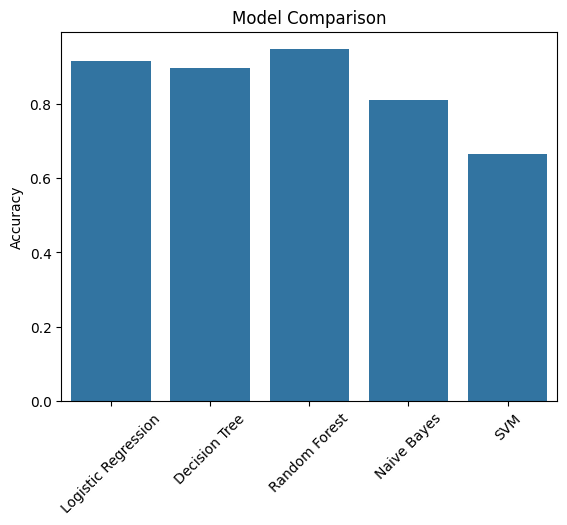

In [7]:
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
